In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from utils import *
import numpy as np

In [44]:
tf.enable_eager_execution()

In [45]:
feat1 = np.load("features/feat1.npy")
feat2 = np.load("features/feat2.npy")
labels = np.load("features/labels.npy")
feat3 = np.load("features/feat3.npy")
feat4 = np.load("features/feat4.npy")
labels34 = np.load("features/labels34.npy")

In [46]:
feat1.shape

(50000, 128)

In [47]:
f1 = [feat1[i1].reshape(-1,1) for i1 in range(len(feat1))]
f2 = [feat2[i2].reshape(-1,1) for i2 in range(len(feat2))]
cos_d = np.array(
    [ feat_distance_cosine_scalar(f1[i].T, f2[i]) for i in range(len(feat1))]).reshape(-1,1)
eucl_d = np.array([ np.linalg.norm(f1[i]- f2[i]) for i in range(len(feat1))]).reshape(-1,1)
sqr_diff = np.power((feat1-feat2), 2)

data_dict = { "labels": labels,
             "cosine_distance": cos_d, 
             "Eucledian_distance": eucl_d,
             "sqaured_difference":sqr_diff}
data = np.hstack([cos_d,eucl_d, sqr_diff])

In [48]:
data.shape

(50000, 130)

In [49]:
eucl_d[:100].shape

(100, 1)

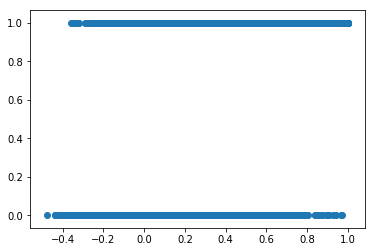

In [50]:
plt.scatter(cos_d, labels)

In [51]:

xtrain, xtest, ytrain, ytest = train_test_split(cos_d, labels, shuffle = True, random_state = 42)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.regularizers import l1, l2
he_init = tf.keras.initializers.VarianceScaling()

model = Sequential()
model.add(Dense(20, activation = 'relu', kernel_initializer = he_init, 
                kernel_regularizer = l1(0.0001), 
                #input_shape = (1,128)
               ))
model.add(Dense(5, activation = 'relu',kernel_initializer = he_init))
model.add(Dense(1, activation = "sigmoid", kernel_initializer = he_init))

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
mcp = ModelCheckpoint("models_chpt/best_modelD.hdf5",verbose = 1, 
                      monitor = "val_loss", save_best_only = True, save_weights_only = True)
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor =0.5)
opt = tf.keras.optimizers.Adam(0.1)
model.compile(optimizer = opt, loss = "binary_crossentropy", 
              metrics = ["accuracy"] )

In [ ]:
bz = 100
epochs = 100
history = model.fit(
    xtrain,
    ytrain,
    epochs = epochs,
    batch_size = bz,
    validation_data =(xtest, ytest),
    callbacks = [mcp, red_lr]
)


Train on 37500 samples, validate on 12500 samples
Epoch 1/100
33400/37500 [=========================>....] - ETA: 0s - loss: 0.4160 - acc: 0.8252
Epoch 00001: val_loss improved from inf to 0.43361, saving model to models_chpt/best_modelD.hdf5
37500/37500 [==============================] - 0s 12us/sample - loss: 0.4161 - acc: 0.8247 - val_loss: 0.4336 - val_acc: 0.8183
Epoch 2/100
34900/37500 [==========================>...] - ETA: 0s - loss: 0.4061 - acc: 0.8276
Epoch 00002: val_loss improved from 0.43361 to 0.41198, saving model to models_chpt/best_modelD.hdf5
37500/37500 [==============================] - 0s 9us/sample - loss: 0.4040 - acc: 0.8292 - val_loss: 0.4120 - val_acc: 0.8225
Epoch 3/100
34800/37500 [==========================>...] - ETA: 0s - loss: 0.4000 - acc: 0.8305
Epoch 00003: val_loss improved from 0.41198 to 0.41121, saving model to models_chpt/best_modelD.hdf5
37500/37500 [==============================] - 0s 9us/sample - loss: 0.4005 - acc: 0.8302 - val_loss: 0.4112

Epoch 29/100
33500/37500 [=========================>....] - ETA: 0s - loss: 0.3982 - acc: 0.8301
Epoch 00029: val_loss did not improve from 0.40036
37500/37500 [==============================] - 0s 9us/sample - loss: 0.3973 - acc: 0.8305 - val_loss: 0.4052 - val_acc: 0.8270
Epoch 30/100
33500/37500 [=========================>....] - ETA: 0s - loss: 0.3965 - acc: 0.8312
Epoch 00030: val_loss improved from 0.40036 to 0.40026, saving model to models_chpt/best_modelD.hdf5
37500/37500 [==============================] - 0s 9us/sample - loss: 0.3970 - acc: 0.8308 - val_loss: 0.4003 - val_acc: 0.8266
Epoch 31/100
33400/37500 [=========================>....] - ETA: 0s - loss: 0.3949 - acc: 0.8317
Epoch 00031: val_loss did not improve from 0.40026
37500/37500 [==============================] - 0s 9us/sample - loss: 0.3971 - acc: 0.8303 - val_loss: 0.4068 - val_acc: 0.8245
Epoch 32/100
31200/37500 [=======================>......] - ETA: 0s - loss: 0.3983 - acc: 0.829 - ETA: 0s - loss: 0.3964 - ac

25800/37500 [===================>..........] - ETA: 0s - loss: 0.3935 - acc: 0.8305

Text(0.5, 1.0, 'Loss Vs # of epochs')

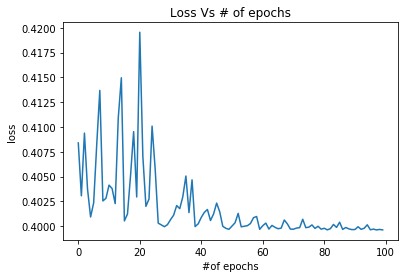

In [58]:
%matplotlib inline 
plt.plot( [i for i in range(epochs)], history.history['val_loss'], label = "validation loss")
plt.xlabel("#of epochs")
plt.ylabel("loss")
plt.title("Loss Vs # of epochs")

Text(0.5, 1.0, 'Loss Vs # of epochs')

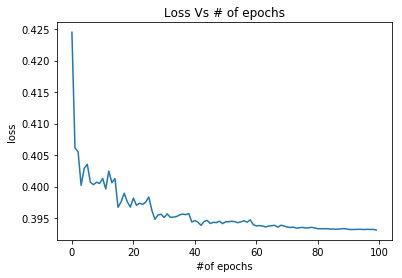

In [59]:
plt.plot([i for i in range(epochs)], history.history['loss'], label = "Train loss")
plt.xlabel("#of epochs")
plt.ylabel("loss")
plt.title("Loss Vs # of epochs")

Text(0.5, 1.0, 'Learning rate Vs # of epochs')

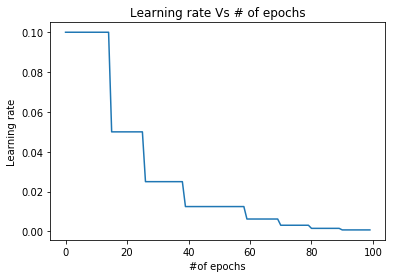

In [60]:
plt.plot([i for i in range(epochs)], history.history['lr'], label = "Train loss")
plt.xlabel("#of epochs")
plt.ylabel("Learning rate")
plt.title("Learning rate Vs # of epochs")

In [61]:
model.evaluate(xtest, ytest)

12500/12500 [==============================] - 0s 16us/sample - loss: 0.3996 - acc: 0.8271


[0.39961667862892153, 0.82712]

In [62]:
model_best = model

In [63]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [64]:
model_best.load_weights("models_chpt/best_modelD.hdf5")

In [66]:
model_best.evaluate(xtest, ytest)

12500/12500 [==============================] - 0s 11us/sample - loss: 0.3996 - acc: 0.8270


[0.3996146966934204, 0.82704]